# Mean-Field Quantum Landau-Lifshitz-Bloch simulations

Mean-Field Quantum Landau-Lifshitz-Bloch simulations

## Setup

Do all necessary imports and settings.

In [4]:
%load_ext autoreload
%autoreload 2

import udkm1Dsim as ud
u = ud.u  # import the pint unit registry from udkm1Dsim
import scipy.constants as constants
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
u.setup_matplotlib()  # use matplotlib with pint units

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Structure

 to the [structure-example](structure.ipynb) for more details.

In [25]:
Co = ud.Atom('Co')
Ni = ud.Atom('Ni')
CoNi = ud.AtomMixed('CoNi')
CoNi.add_atom(Co, 0.5)
CoNi.add_atom(Ni, 0.5)
Si = ud.Atom('Si')

In [26]:
prop_CoNi = {}
prop_CoNi['heat_capacity'] = ['0.1*T',
                              532*u.J/u.kg/u.K,
                             ]
prop_CoNi['therm_cond'] = [20*u.W/(u.m*u.K),
                           80*u.W/(u.m*u.K),]

prop_CoNi['aniso_exponents'] = [1, 2, 3]

R = 25.3/1e-12
Tc = 1388
g = 4.0e18

prop_CoNi['sub_system_coupling'] = \
    ['-{:f}*(T_0-T_1)'.format(g),
     '{:f}*(T_0-T_1)'.format(g)
    ]
prop_CoNi['lin_therm_exp'] = [0, 11.8e-6]
prop_CoNi['sound_vel'] = 4.910*u.nm/u.ps
prop_CoNi['opt_ref_index'] = 2.9174+3.3545j

layer_CoNi = ud.AmorphousLayer('CoNi', 'CoNi amorphous', thickness=1*u.nm,
                               density=7000*u.kg/u.m**3, atom=CoNi, **prop_CoNi)

Number of subsystems changed from 1 to 2.


In [27]:
print(layer_CoNi)

Amorphous layer with the following properties

=============================  ==========================================
                    parameter  value
=============================  ==========================================
                           id  CoNi
                         name  CoNi amorphous
                    thickness  1.0 nm
                         area  0.01 nm²
                       volume  0.01 nm³
                         mass  7×10⁻²⁶ kg
           mass per unit area  7×10⁻²⁶ kg
                      density  7×10³ kg/m³
                    roughness  0.0 nm
          Debye Waller Factor  0 m²
               sound velocity  4.91×10³ m/s
              spring constant  [1.6875670000000007] kg/s²
               phonon damping  0.0 kg/s
              opt. pen. depth  0.0 nm
        opt. refractive index  (2.9174+3.3545j)
       opt. ref. index/strain  0
             thermal conduct.  20.0 W/(m K)
                               80.0 W/(m K)
     linear therma

In [4]:
prop_Si = {}
prop_Si['heat_capacity'] = [100*u.J/u.kg/u.K, 603*u.J/u.kg/u.K]
prop_Si['therm_cond'] = [0, 100*u.W/(u.m*u.K)]

prop_Si['sub_system_coupling'] = [0, 0]

prop_Si['lin_therm_exp'] = [0, 2.6e-6]
prop_Si['sound_vel'] = 8.433*u.nm/u.ps
prop_Si['opt_ref_index'] = 3.6941+0.0065435j

layer_Si = ud.AmorphousLayer('Si', "Si amorphous", thickness=1*u.nm, density=2336*u.kg/u.m**3,
                             atom=Si, **prop_Si)

Number of subsystems changed from 1 to 2.


In [5]:
S = ud.Structure('CoNi')

S.add_sub_structure(layer_CoNi, 20)
S.add_sub_structure(layer_Si, 50)

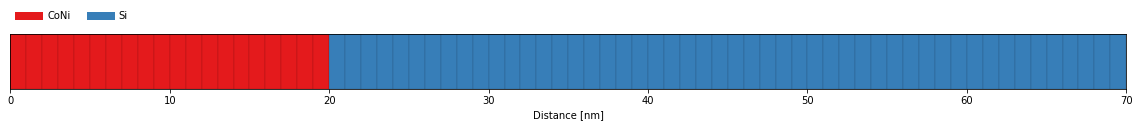

In [6]:
S.visualize()

## Initialize Heat and the Excitation

In [7]:
h = ud.Heat(S, True)

h.save_data = False
h.disp_messages = True

In [8]:
h.excitation = {'fluence': [30]*u.mJ/u.cm**2,
                'delay_pump':  [0]*u.ps,
                'pulse_width':  [0.05]*u.ps,
                'multilayer_absorption': True,
                'wavelength': 800*u.nm,
                'theta': 45*u.deg}
# temporal and spatial grid
delays = np.r_[-1:5:0.005]*u.ps
_, _, distances = S.get_distances_of_layers()

## Calculate Heat Diffusion

In [9]:
# enable heat diffusion
h.heat_diffusion = True
# set the boundary conditions
h.boundary_conditions = {'top_type': 'isolator', 'bottom_type': 'isolator'}
# The resulting temperature profile is calculated in one line:

temp_map, delta_temp = h.get_temp_map(delays, 300)

Surface incidence fluence scaled by factor 0.7071 due to incidence angle theta=45.00 deg
Calculating _heat_diffusion_ for excitation 1:1 ...
Absorption profile is calculated by multilayer formalism.
Total reflectivity of 42.4 % and transmission of 28.4 %.


0it [00:00, ?it/s]

Elapsed time for _heat_diffusion_ with 1 excitation(s): 1.595883 s
Calculating _heat_diffusion_ without excitation...


0it [00:00, ?it/s]

Elapsed time for _heat_diffusion_: 1.774550 s
Elapsed time for _temp_map_: 3.414018 s


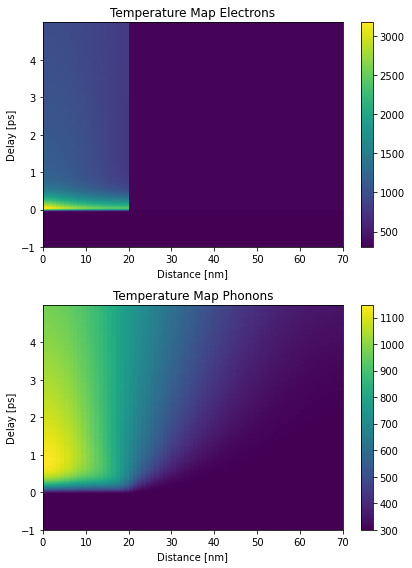

In [10]:
plt.figure(figsize=[6, 8])
plt.subplot(2, 1, 1)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, temp_map[:, :, 0],
               shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('Temperature Map Electrons')

plt.subplot(2, 1, 2)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, temp_map[:, :, 1],
               shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('Temperature Map Phonons')

plt.tight_layout()
plt.show()

## Magnetization

In [11]:
mag = ud.LLB(S, True)
mag.save_data = False
print(mag)

Landau-Lifshitz-Bloch Magnetization Dynamics simulation properties:

Magnetization simulation properties:

This is the current structure for the simulations:

Structure properties:

Name   : CoNi
Thickness : 70.00 nanometer
Roughness : 0.00 nanometer
----
20 times CoNi amorphous: 20.00 nanometer
50 times Si amorphous: 50.00 nanometer
----
no substrate


Display properties:

================  =======
       parameter  value
================  =======
    force recalc  True
 cache directory  ./
display messages  True
       save data  False
    progress bar  True
================  =======


In [12]:
magnetization_map = mag.get_magnetization_map(delays, temp_map=temp_map)

Calculating _magnetization_map_ ...


0it [00:00, ?it/s]

Elapsed time for _LLB_: 0.032401 s
Elapsed time for _magnetization_map_: 0.032401 s


In [13]:
magnetization_map

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])